# Dog Breed Identification

https://www.kaggle.com/competitions/dog-breed-identification/overview


Let's play around with nerual networks (https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4) to predict the breed of a dog through an image.

# A) B) C) D)

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# A) ########## Get our datas ##########
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision2/labels.csv") #Contains all the labels for all the images in the train folder

# X (attributes/images)
# Create pathnames from image ID's (so later we can access the images from the train folder)
filenames = ["drive/MyDrive/Dog Vision2/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# y (target)
labels = np.array(labels_csv["breed"])
breeds = np.unique(labels) #Let's get the 120 different breeds in our data

# Represent the labels (target) into boolean
bool_labels = [label == breeds for label in labels]

# Setup X & y variables
X = filenames
y = bool_labels

# Set number of images to use for experimenting
NUM_IMAGES = 1000

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2, random_state=42) #random_state is just random seed


# B) ########## Preprocess our data (turn into Tensorflow) ########## (check functions below for more detail)
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)


# C) ########## Create our Model ########## (check functions below for more detail)
model = create_model()
model.summary()


# D) ########## Train our model ##########
# Fit the model to the data
model = train_model(train_data, val_data)

# Save our model
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Creating training data batches...
Creating validation data batches...


In [ ]:
# # See the result of the trained model
# %tensorboard --logdir drive/MyDrive/Dog\ Vision2/logs

# E) Use our model to Predict given data

In [ ]:
# E) ########## Use our model to Predict some given data ##########
trained_model = load_model("drive/MyDrive/Dog Vision2/models/20240601-06151717222540-1000-images-mobilenetv2-Adam.h5")
predictions = trained_model.predict(val_data, verbose=1) # the val_data contains both the features and target, but since we use `predict` it will only look at the features first to predict

#Note: predictions will be a list of numpy arrays showing the probability of an image being a certain breed

Loading saved model from: drive/MyDrive/Dog Vision2/models/20240601-06151717222540-1000-images-mobilenetv2-Adam.h5
7/7 [==============================] - 92s 4s/step


# F) Evaluate our prediction

In [ ]:
# F) ########## Evaluate our prediction ##########
trained_model.evaluate(val_data)

7/7 [==============================] - 14s 2s/step - loss: 1.1987 - accuracy: 0.7000


[1.1987234354019165, 0.699999988079071]

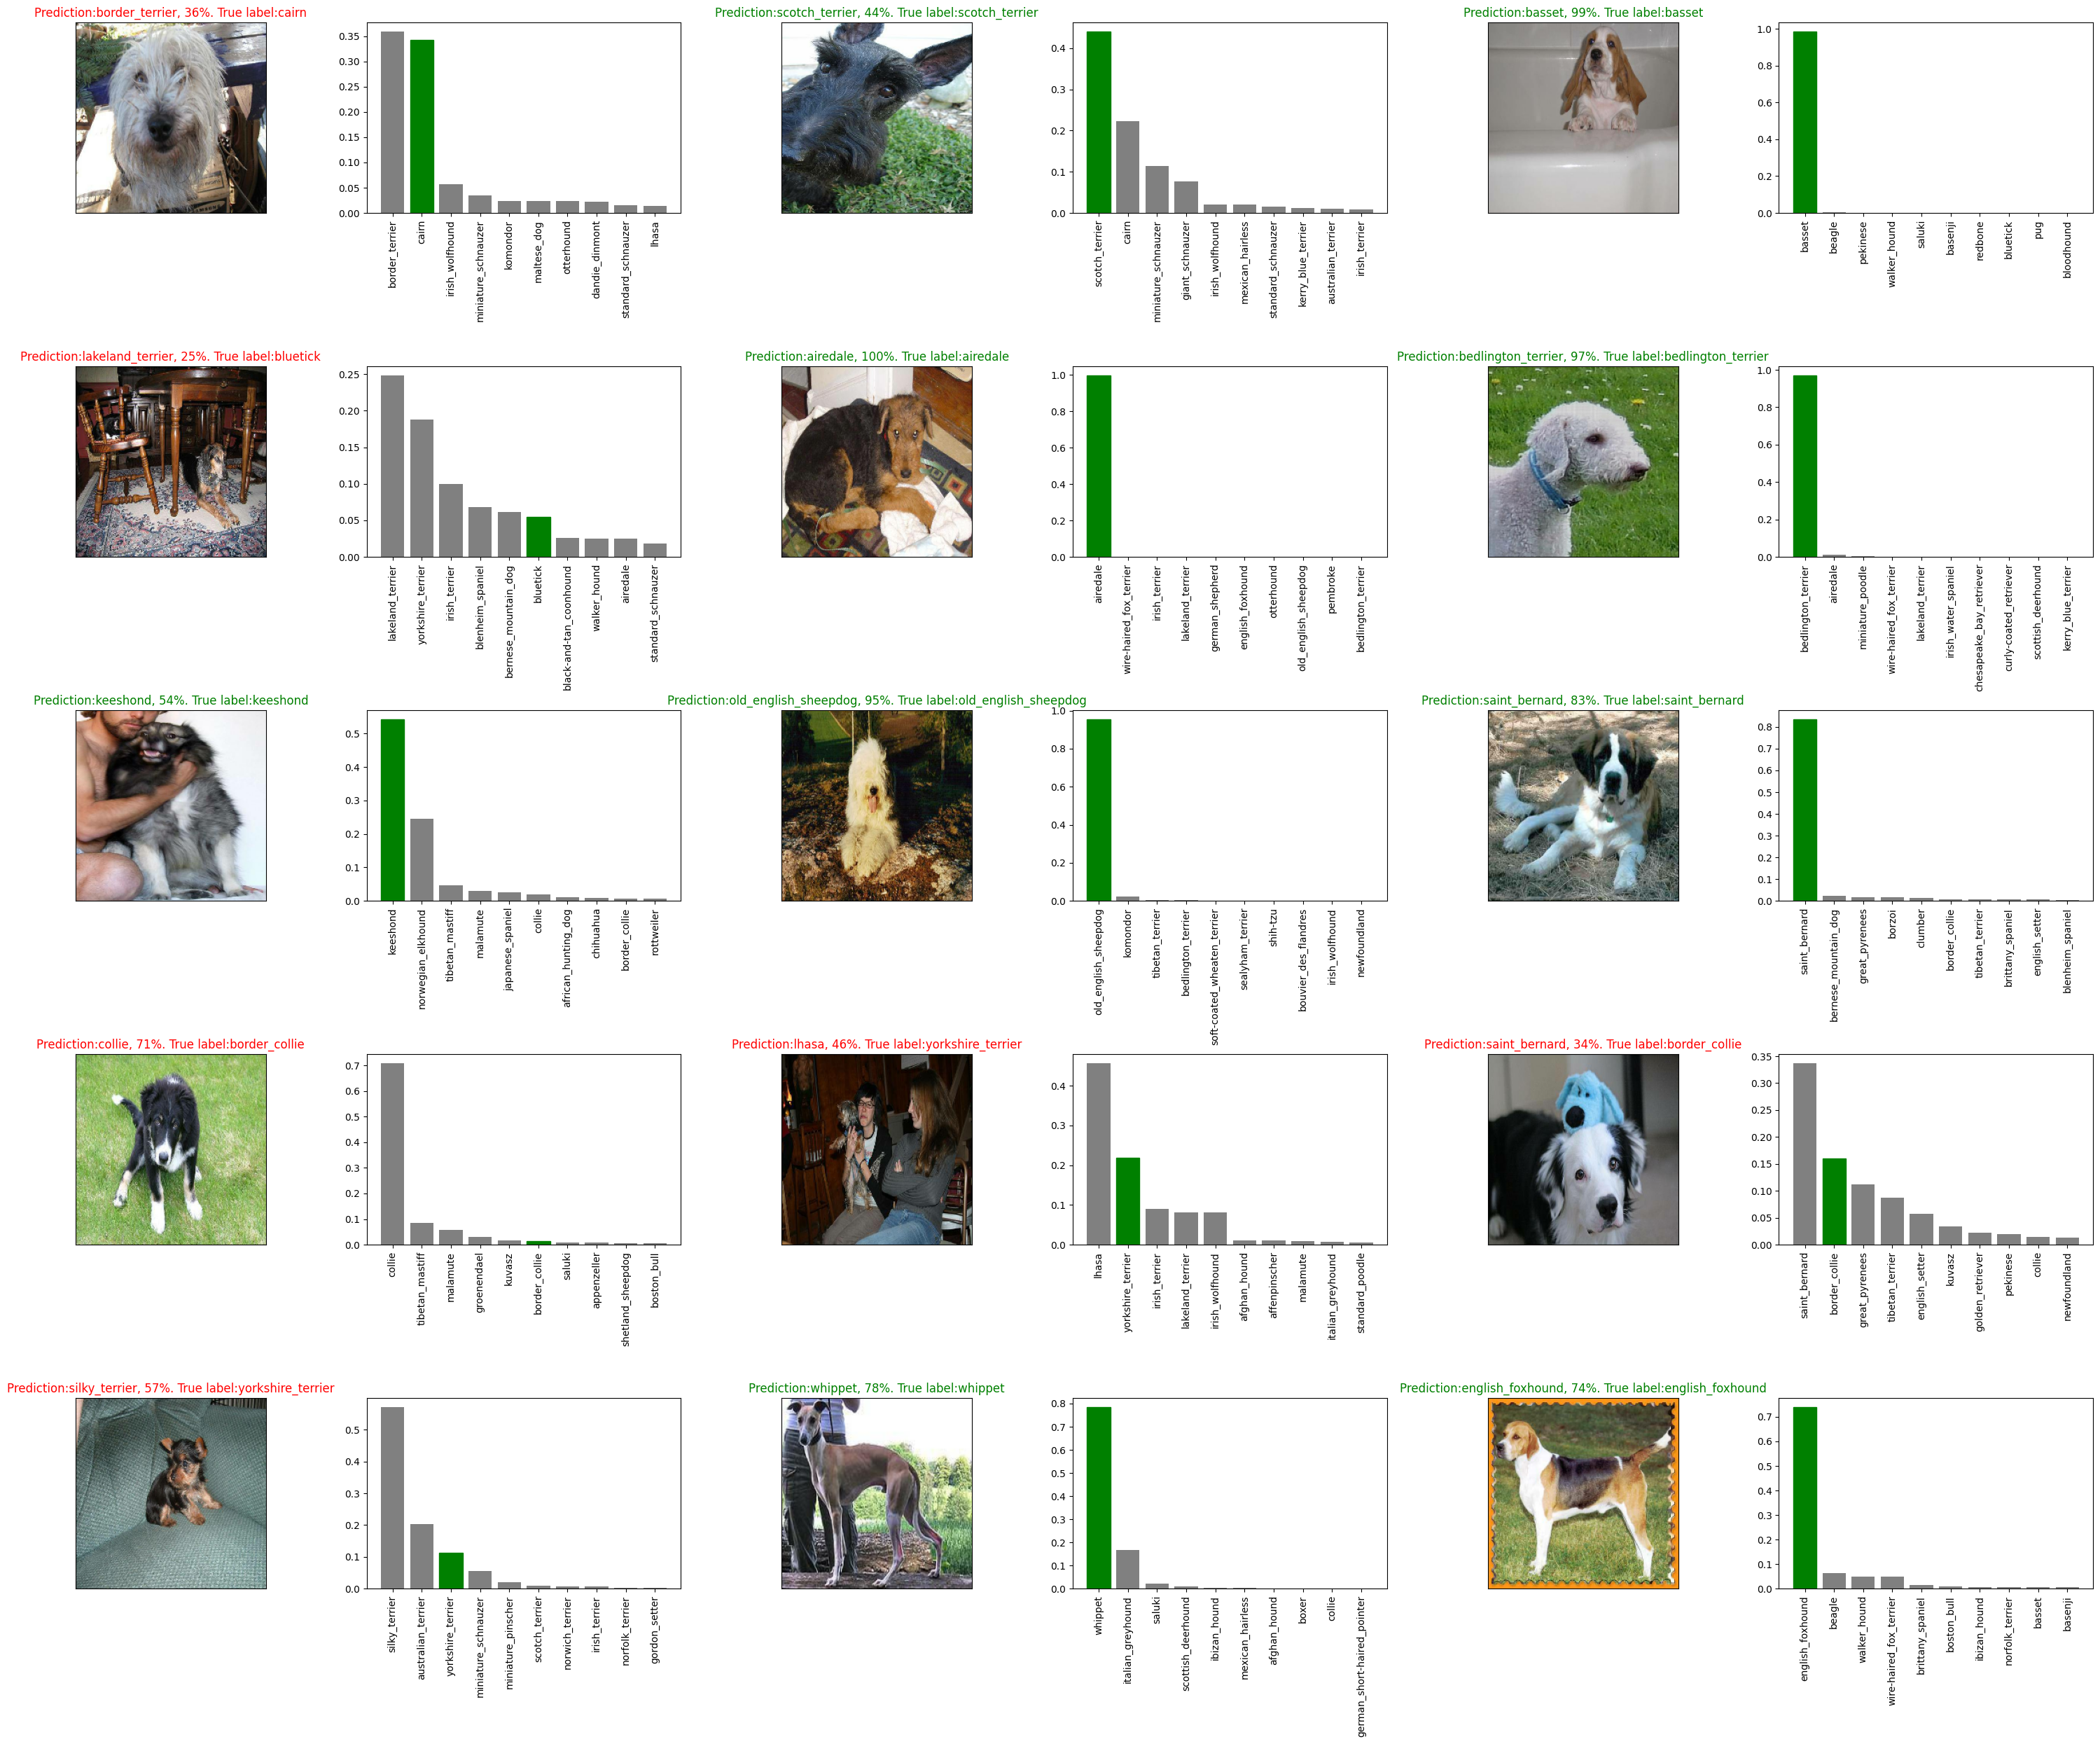

In [ ]:
# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)

# plot_pred(prediction_probabilities=predictions,
#           labels=val_labels,
#           images=val_images,
#           n=81)

# Let's see some predictions to see how well our model is predicting
# i_multiplier = 20
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i)
plt.tight_layout(h_pad=1.0) #organize the plots together, h_pad= give more padding on the horizontal axis
plt.show()

# G) Use our model to Predict on the test folder

In [ ]:
# G) ########## Use our model to Predict on the test folder ########## (Only images, and our model will predict its label)
import os
dir_path = "drive/MyDrive/Dog Vision2/test/"
all_files = os.listdir(dir_path)

filenamesTest = [dir_path + file for file in all_files]
test_data = create_data_batches(filenamesTest, test_data=True)

trained_model = load_model("drive/MyDrive/Dog Vision2/models/20240601-06151717222540-1000-images-mobilenetv2-Adam.h5")
predic_test = trained_model.predict(test_data, verbose=1)

Creating test data batches...
Loading saved model from: drive/MyDrive/Dog Vision2/models/20240601-06151717222540-1000-images-mobilenetv2-Adam.h5
324/324 [==============================] - 245s 733ms/step


In [ ]:
get_pred_label(predic_test[2])

'malinois'

In [ ]:
len(predic_test)

10357

In [ ]:
custom_pred_labels = [get_pred_label(predic_test[i]) for i in range(len(predic_test))]
custom_pred_labels

['papillon',
 'malinois',
 'malinois',
 'maltese_dog',
 'welsh_springer_spaniel',
 'tibetan_terrier',
 'pomeranian',
 'kerry_blue_terrier',
 'mexican_hairless',
 'collie',
 'pug',
 'borzoi',
 'english_foxhound',
 'scottish_deerhound',
 'chihuahua',
 'saluki',
 'miniature_pinscher',
 'boston_bull',
 'samoyed',
 'flat-coated_retriever',
 'schipperke',
 'norwegian_elkhound',
 'siberian_husky',
 'collie',
 'redbone',
 'brabancon_griffon',
 'japanese_spaniel',
 'boston_bull',
 'border_terrier',
 'pug',
 'cardigan',
 'pekinese',
 'boston_bull',
 'gordon_setter',
 'welsh_springer_spaniel',
 'cardigan',
 'kuvasz',
 'japanese_spaniel',
 'tibetan_terrier',
 'basenji',
 'black-and-tan_coonhound',
 'kuvasz',
 'komondor',
 'groenendael',
 'italian_greyhound',
 'chow',
 'pekinese',
 'soft-coated_wheaten_terrier',
 'american_staffordshire_terrier',
 'bernese_mountain_dog',
 'collie',
 'cairn',
 'blenheim_spaniel',
 'african_hunting_dog',
 'irish_terrier',
 'beagle',
 'newfoundland',
 'walker_hound',


In [ ]:
custom_images = unbatchify(test_data, test_data=True) #returns tensorflow dataset

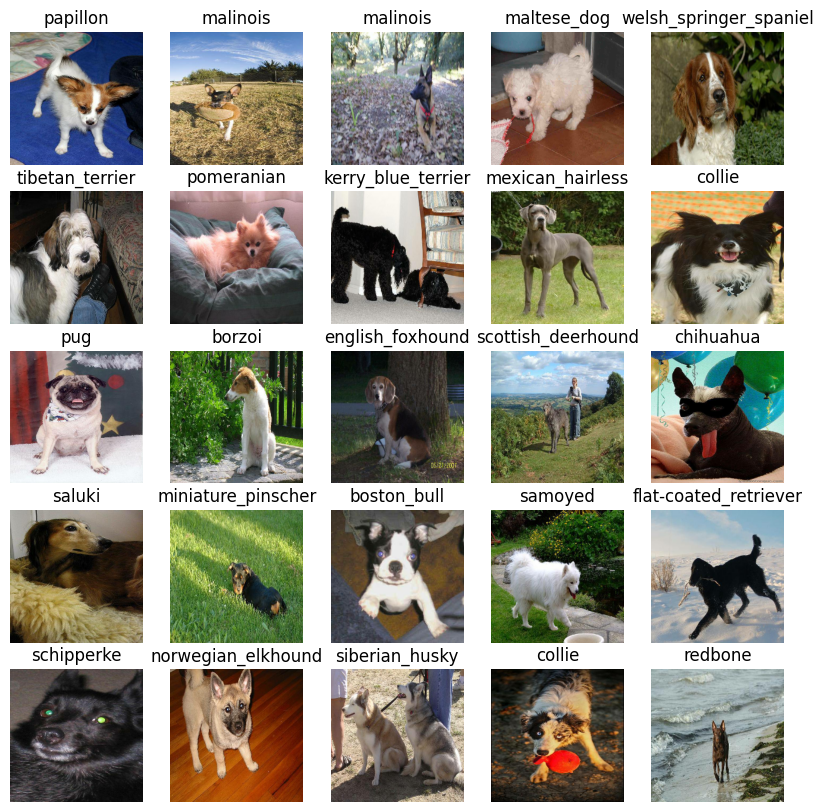

In [ ]:
show_25_images(custom_images, predic_test)

# HELPER FUNCTIONS


## Pre-processing data & creating Model

In [ ]:
# Functions--------------

import tensorflow as tf
import tensorflow_hub as hub
import os
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import imread

# Define image size
IMG_SIZE = 224
# Define the batch size, 32 is a good start
BATCH_SIZE = 32

# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of our model
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision2/labels.csv") #Contains all the labels for all the images in the train folder
labels = np.array(labels_csv["breed"])
breeds = np.unique(labels) #Let's get the 120 different breeds in our data
OUTPUT_SHAPE = len(breeds)

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

# Load TensorBoard notebook extension
%load_ext tensorboard

# Create early stopping callback for `train_model()`
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)
NUM_EPOCHS = 100


# Create a function for preprocessing images (image into Tensor)
def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """
  # Read in an image file (The next two lines are similar to the one above, read the image file, then turn into tensor)
  image = tf.io.read_file(image_path)

  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the colour channel values from 0-255 to 0-1 values (This is normalization, to make computing on the image efficient)
  image = tf.image.convert_image_dtype(image, tf.float32)

  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image


# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the assosciated label,
  processes the image and reutrns a typle of (image, label).
  """
  image = process_image(image_path)
  return image, label


# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")

     # creates tensorflow dataset, so that we could turn this into batches
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE) # process the images in the data
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")

     # creates tensorflow dataset, so that we could turn this into batches
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) # process the images & the labels in the data
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors

    # creates tensorflow dataset, so that we could turn this into batches
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_image_label) # process the images & the labels in the data

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer) this is the mobilenet_v2 that we chose
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, #in the output we want it to spit out in the size of our OUTPUT_SHAPE instead of the output from mobilenet_v2
                          activation="softmax") # Layer 2 (output layer) "sigmoid" for binary classification, "softmax" for multi-class classification
  ])

  # Compile the model (How we want to train our model)
  model.compile(                                      # "CategoricalCrossentropy" for multi-class, "BinaryCrossentropy" for binary classification
      loss=tf.keras.losses.CategoricalCrossentropy(), # loss = The measure of how well the model is guessing (higher the loss the worst the prediction)
      optimizer=tf.keras.optimizers.Adam(), # optimizer = helps the model predict, Adam optimizer seem to be the most common that works well with most models
      metrics=["accuracy"] # the evaluation used when guessing
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model


# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision2/logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")) # Year/Month/Day - Hour/Minutes/Seconds
  return tf.keras.callbacks.TensorBoard(logdir)


# Build a function to train and return a trained model
def train_model(train_data, val_data):
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_data, # this is in batches
            epochs=NUM_EPOCHS,
            validation_data=val_data, # this is in batches
            validation_freq=1, # how many times we should try our trained model (from the train set) on our validation set
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model


# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return breeds[np.argmax(prediction_probabilities)] # breeds defined in the first cell (lol)


def unbatchify(data, test_data=False):
  """
  Takes a batched dataset of (image, label) Tensors and reutrns separate arrays
  of images and labels.
  """
  if test_data:
    custom_images = [] #returns tensorflow dataset

    # Loop through unbatched data
    for image in data.unbatch().as_numpy_iterator():
      custom_images.append(image)

    return custom_images

  else:
    images = []
    labels = []
    # Loop through unbatched data
    for image, label in data.unbatch().as_numpy_iterator():
      images.append(image)
      labels.append(breeds[np.argmax(label)]) # breeds defined in the first cell (lol)

    return images, labels

## Plotting Functions

In [ ]:
## Plotting functions

def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("Prediction:{}, {:2.0f}%. True label:{}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)


def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1] # argsort() returns the list containing the indices that would sort the list

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]

  # Find the top 10 prediction labels
  top_10_pred_labels = breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), #10 bars in our plot
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels): # if the true label is inide the top 10 list, then color it green
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass


# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))

  # Loop through 25 (for displaying 25 images)
  for i in range(25):

    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)

    # Display an image
    plt.imshow(images[i])

    # Add the image label as the title
    plt.title(breeds[labels[i].argmax()])

    # Turn the grid lines off
    plt.axis("off")

## Save and Load model functions

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision2/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})# this is added to specify that we are using a custom layer
  return model